In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
!unzip imdb-dataset-of-50k-movie-reviews.zip

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
imdb-dataset-of-50k-movie-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  imdb-dataset-of-50k-movie-reviews.zip
replace IMDB Dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
from sklearn.metrics import accuracy_score
from scipy.stats import uniform
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from collections import Counter
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data = pd.read_csv("IMDB Dataset.csv")
print(data.head())
print(data.shape)
label=data['sentiment'].value_counts()

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
(50000, 2)


In [ ]:
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.lower().split()
    filtered_words = [word for word in text if word not in stop_words]
    return ' '.join(filtered_words)

data['cleaned_review'] = data['review'].apply(clean_text)

print(data[['cleaned_review']].head())

                                      cleaned_review
0  one reviewers mentioned watching oz episode yo...
1  wonderful little production filming technique ...
2  thought wonderful way spend time hot summer we...
3  basically theres family little boy jake thinks...
4  petter matteis love time money visually stunni...


In [ ]:
data['sentiment'] = data['sentiment'].replace({'positive': 1, 'negative': 0})
print(data[['cleaned_review','sentiment']].head())

                                      cleaned_review  sentiment
0  one reviewers mentioned watching oz episode yo...          1
1  wonderful little production filming technique ...          1
2  thought wonderful way spend time hot summer we...          1
3  basically theres family little boy jake thinks...          0
4  petter matteis love time money visually stunni...          1


<ipython-input-34-5d60ae347c0a>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sentiment'] = data['sentiment'].replace({'positive': 1, 'negative': 0})


In [ ]:
positive_reviews = data[data['sentiment'] == 1]['cleaned_review']
negative_reviews = data[data['sentiment'] == 0]['cleaned_review']

positive_word_counts=Counter(' '.join(positive_reviews).split())
negative_word_counts=Counter(' '.join(negative_reviews).split())

top_positive_words = positive_word_counts.most_common(20)
top_negative_words = negative_word_counts.most_common(20)

top_positive_words_dict = dict(top_positive_words)
top_negative_words_dict = dict(top_negative_words)

print(top_positive_words_dict)
print(top_negative_words_dict)

{'film': 39437, 'movie': 36043, 'one': 25739, 'like': 17057, 'good': 14352, 'great': 12647, 'story': 12380, 'see': 11869, 'time': 11785, 'well': 10980, 'really': 10676, 'also': 10553, 'would': 10368, 'even': 9365, 'much': 8998, 'first': 8864, 'films': 8457, 'love': 8401, 'people': 8365, 'best': 8302}
{'movie': 47533, 'film': 35075, 'one': 24652, 'like': 21777, 'even': 14920, 'good': 14150, 'bad': 14095, 'would': 13633, 'really': 12224, 'time': 11512, 'see': 10568, 'dont': 10037, 'get': 9998, 'much': 9898, 'story': 9680, 'people': 9121, 'could': 9032, 'make': 8985, 'made': 8395, 'movies': 8357}


# **ASCII**

In [ ]:
def text_to_ascii(text):
    return ' '.join(str(ord(char)) for char in text)

data1=data.copy()
data1['ascii_review'] = data1['cleaned_review'].apply(text_to_ascii)
print(data1[['cleaned_review', 'ascii_review']].head())

                                      cleaned_review  \
0  one reviewers mentioned watching oz episode yo...   
1  wonderful little production filming technique ...   
2  thought wonderful way spend time hot summer we...   
3  basically theres family little boy jake thinks...   
4  petter matteis love time money visually stunni...   

                                        ascii_review  
0  111 110 101 32 114 101 118 105 101 119 101 114...  
1  119 111 110 100 101 114 102 117 108 32 108 105...  
2  116 104 111 117 103 104 116 32 119 111 110 100...  
3  98 97 115 105 99 97 108 108 121 32 116 104 101...  
4  112 101 116 116 101 114 32 109 97 116 116 101 ...  


In [ ]:
X1 = list(data1['ascii_review'])
y1 = data1['sentiment']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
X_train1, X_val1, y_train1, y_val1 = train_test_split(X_train1, y_train1, test_size=0.25, random_state=42)  # 0.25*0.8 = 0.2 validation

print("Training size:", len(X_train1))
print("Validation size:", len(X_val1))
print("Test size:", len(X_test1))


Training size: 30000
Validation size: 10000
Test size: 10000


In [ ]:
vectorizer = CountVectorizer(binary=True)
X_train_encoded = vectorizer.fit_transform(X_train1)
X_test_encoded = vectorizer.transform(X_test1)

logreg1 = LogisticRegression(max_iter=1000)
logreg1.fit(X_train_encoded, y_train1)

logreg1_pred = logreg1.predict(X_test_encoded)

print("Logistic Regression Classifier Results:")
print(classification_report(y_test1, logreg1_pred))

Logistic Regression Classifier Results:
              precision    recall  f1-score   support

           0       0.55      0.49      0.52      4961
           1       0.55      0.60      0.57      5039

    accuracy                           0.55     10000
   macro avg       0.55      0.55      0.54     10000
weighted avg       0.55      0.55      0.54     10000



In [ ]:
knn1 = KNeighborsClassifier(n_neighbors=10)
knn1.fit(X_train_encoded, y_train1)
knn_pred1 = knn1.predict(X_test_encoded)

print("KNN Classifier Results:")
print(classification_report(y_test1, knn_pred1))

KNN Classifier Results:
              precision    recall  f1-score   support

           0       0.50      0.80      0.62      4961
           1       0.54      0.23      0.32      5039

    accuracy                           0.51     10000
   macro avg       0.52      0.51      0.47     10000
weighted avg       0.52      0.51      0.47     10000



# **ուղղակի վեկտորիզացրած**

In [ ]:
all_reviews = data['cleaned_review']
vect = TfidfVectorizer(max_features=2000)
review_vectors = vect.fit_transform(all_reviews)

print(review_vectors.shape)

(50000, 2000)


In [ ]:
X = review_vectors
y = data['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25*0.8 = 0.2 validation

print(X_train.shape, X_val.shape, X_test.shape)

(30000, 2000) (10000, 2000) (10000, 2000)


# **LR**

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
print("Logistic Regression Classifier Results:")
print(classification_report(y_test, logreg_pred))

Logistic Regression Classifier Results:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      4961
           1       0.87      0.89      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



# **KNN**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10, metric="euclidean")
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("K-Nearest Neighbors Classifier Results:")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors Classifier Results:
              precision    recall  f1-score   support

           0       0.70      0.82      0.76      4961
           1       0.79      0.66      0.72      5039

    accuracy                           0.74     10000
   macro avg       0.75      0.74      0.74     10000
weighted avg       0.75      0.74      0.74     10000



# **համեմատում**

In [ ]:
print(classification_report(y_test, logreg_pred))
print(classification_report(y_test1, logreg1_pred))
report = classification_report(y_test, logreg_pred, output_dict=True)
accuracy = report['accuracy']
print("Logistic Regression Accuracy for TfidfVectorizer data:", accuracy)
report1 = classification_report(y_test1, logreg1_pred, output_dict=True)
accuracy1 = report1['accuracy']
print("Logistic Regression Accuracy for One-Hot Vectorizated data:", accuracy1)
if accuracy > accuracy1:
  print("TfidfVectorizer is better")
else:
  print("One-Hot encoding with ASCII is better")


              precision    recall  f1-score   support

           0       0.88      0.87      0.87      4961
           1       0.87      0.89      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

              precision    recall  f1-score   support

           0       0.55      0.49      0.52      4961
           1       0.55      0.60      0.57      5039

    accuracy                           0.55     10000
   macro avg       0.55      0.55      0.54     10000
weighted avg       0.55      0.55      0.54     10000

Logistic Regression Accuracy for TfidfVectorizer data: 0.8763
Logistic Regression Accuracy for One-Hot Vectorizated data: 0.5462
TfidfVectorizer is better


# **պարամետրերի ընտրություն**

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100]}
logreg = LogisticRegression()
grid_search_logreg = GridSearchCV(logreg, param_grid, scoring='f1', cv=3)
grid_search_logreg.fit(X_train, y_train)

print("Best Logistic Regression Parameters:", grid_search_logreg.best_params_)
print("Best F1 Score for Logistic Regression:", grid_search_logreg.best_score_)


Best Logistic Regression Parameters: {'C': 1}
Best F1 Score for Logistic Regression: 0.8718160027982628


In [ ]:
param_dist_knn = {
    'n_neighbors': [10,15],
    'metric': ['euclidean']
}

knn = KNeighborsClassifier()
random_search_knn = RandomizedSearchCV(knn, param_dist_knn, n_iter=2, scoring='f1', cv=3, random_state=42)
random_search_knn.fit(X_train, y_train)

print("Best Parameters for KNN:", random_search_knn.best_params_)
print("Best F1 Score for KNN:", random_search_knn.best_score_)

Best Parameters for KNN: {'n_neighbors': 15, 'metric': 'euclidean'}
Best F1 Score for KNN: 0.7610051997853585


In [ ]:
print("KNN Model F1-Score: ", random_search_knn.best_score_)
print("Logistic Regression Model F1-Score: ", grid_search_logreg.best_score_)

KNN Model F1-Score:  0.7610051997853585
Logistic Regression Model F1-Score:  0.8718160027982628


In [ ]:
best_model = 'KNN with F1-score {random_search_knn.best_score_}' if random_search_knn.best_score_ > grid_search_logreg.best_score_ else f"Logistic Regression with F1-score {grid_search_logreg.best_score_}"
print(f"The best model is: {best_model}")

The best model is: Logistic Regression with F1-score 0.8718160027982628


# **նոր մոդել**

In [ ]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)
print(classification_report(y_test, y_pred_nb))


              precision    recall  f1-score   support

           0       0.85      0.84      0.84      4961
           1       0.84      0.85      0.85      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [ ]:
param_dist = {
    'alpha': np.linspace(0.1, 5, 50),
    'fit_prior': [True, False]
}

nb = MultinomialNB()
random_search_nb = RandomizedSearchCV(nb, param_dist, n_iter=10, cv=3, scoring='f1', random_state=42)
random_search_nb.fit(X_train, y_train)

print("Best Parameters:", random_search_nb.best_params_)
print("Best F1 Score:", random_search_nb.best_score_)


Best Parameters: {'fit_prior': False, 'alpha': 2.0}
Best F1 Score: 0.8447070193525329


In [ ]:
linear_svc = LinearSVC(C=1.0, random_state=42)
linear_svc.fit(X_train, y_train)
linear_svc_pred = linear_svc.predict(X_test)

print("LinearSVC Classifier Results:")
print(classification_report(y_test, linear_svc_pred))


LinearSVC Classifier Results:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4961
           1       0.87      0.88      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [ ]:
param_dist = {
    'C': uniform(0.1, 1),
    'max_iter': [1000],
    'tol': [1e-3]
}

random_search_svc = RandomizedSearchCV(LinearSVC(random_state=42), param_distributions=param_dist, n_iter=10, cv=3, random_state=42, n_jobs=-1)
random_search_svc.fit(X_train, y_train)
print("Best LinearSVC parameters: ", random_search_svc.best_params_)
print("Best LinearSVC Score:", random_search_svc.best_score_)


Best LinearSVC parameters:  {'C': 0.15808361216819947, 'max_iter': 1000, 'tol': 0.001}
Best LinearSVC Score: 0.8716666666666667


In [ ]:
best_model = f'LinearSVC with F1-score {random_search_svc.best_score_}' if random_search_svc.best_score_ > random_search_nb.best_score_ else f'MultinomialNb with F1-score {random_search_nb.best_score_}'
print(f"The best model is: {best_model}")


The best model is: LinearSVC with F1-score 0.8716666666666667


# **Confusion matrix**

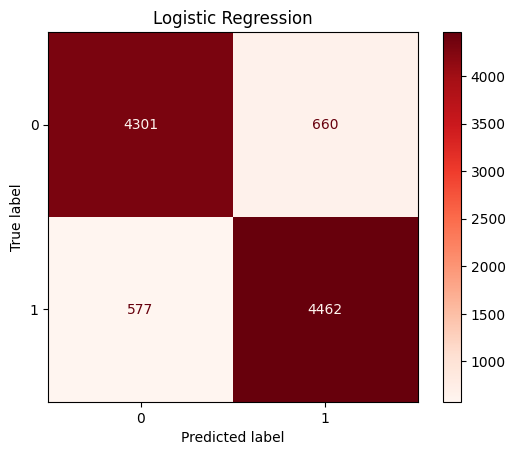

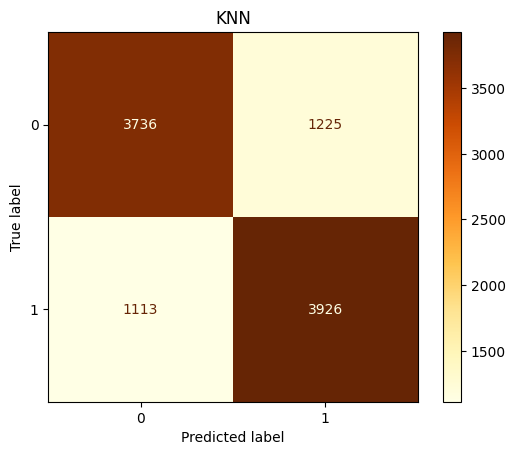

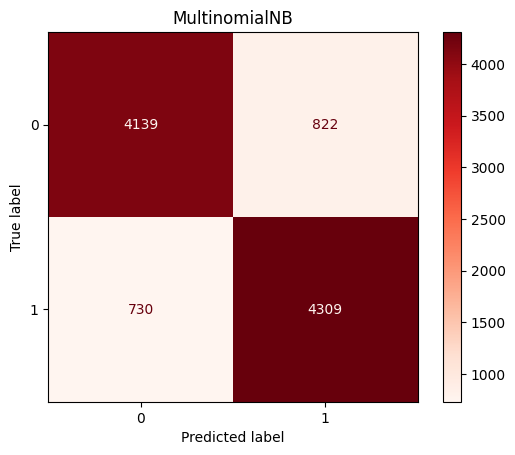

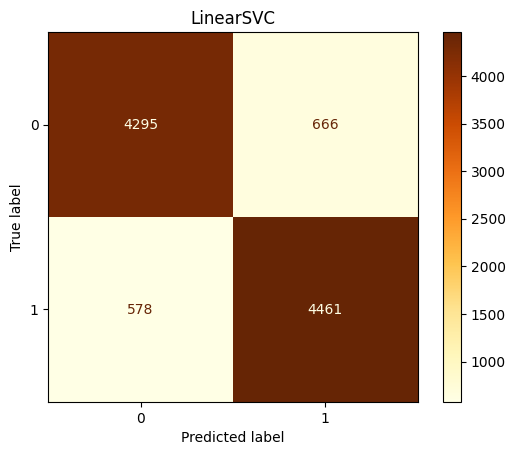

In [ ]:
y_pred_logreg = grid_search_logreg.predict(X_test)
y_pred_knn = random_search_knn.predict(X_test)

cm_logreg = confusion_matrix(y_test, y_pred_logreg)
cm_knn = confusion_matrix(y_test, y_pred_knn)

disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)

disp_logreg.plot(cmap=plt.cm.Reds)
plt.title('Logistic Regression')
disp_knn.plot(cmap=plt.cm.YlOrBr)
plt.title('KNN')

y_pred_nb = random_search_nb.predict(X_test)
y_pred_svc = random_search_svc.predict(X_test)

cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_svc = confusion_matrix(y_test, y_pred_svc)

disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb)
disp_svc = ConfusionMatrixDisplay(confusion_matrix=cm_svc)

disp_nb.plot(cmap=plt.cm.Reds)
plt.title('MultinomialNB')
disp_svc.plot(cmap=plt.cm.YlOrBr)
plt.title('LinearSVC')

plt.show()

In [ ]:
report_log = classification_report(y_test, logreg_pred, output_dict=True)
logreg_f1 = report_log['weighted avg']['f1-score']

report_knn = classification_report(y_test, y_pred_knn, output_dict=True)
knn_f1 = report_knn['weighted avg']['f1-score']

report_nb = classification_report(y_test, y_pred_nb, output_dict=True)
nb_f1 = report_nb['weighted avg']['f1-score']

report_svc = classification_report(y_test, y_pred_svc, output_dict=True)
svc_f1 = report_svc['weighted avg']['f1-score']

results = {
    "Logistic Regression": logreg_f1,
    "KNN": knn_f1,
    "MultinomialNB": nb_f1,
    "LinearSVC": svc_f1
}

best_model = max(results, key=results.get)

for model, f1 in results.items():
    print(f"{model} F1-Score: {f1:.4f}")

print(f"\n The Best Model is: {best_model} with F1-Score: {results[best_model]:.4f}")

Logistic Regression F1-Score: 0.8763
KNN F1-Score: 0.7662
MultinomialNB F1-Score: 0.8448
LinearSVC F1-Score: 0.8756

 The Best Model is: Logistic Regression with F1-Score: 0.8763
